In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Model Definition

In [ ]:
# Create a model class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 featues of the folwer) -->
  # Hidden Layer 1 (number of neurons) -->
  # Hidden Layer 2 (number of neurons) -->
  # Output Layer (3 classes of flower) -->
    def __init__(self, input_features=4, h1=8, h2=7, output_features=3):
        super().__init__() # instanciate nn.Module
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

        # Define forward method
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
# Pick a manual seed for randomization
torch.manual_seed(44)
# Create an instance of model
model = Model()

# Data Preparation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
my_data = pd.read_csv('/content/Iris.csv')

# Data Visualization

In [ ]:
my_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Change last column from strings to integers
my_data['Species'] = my_data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
my_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


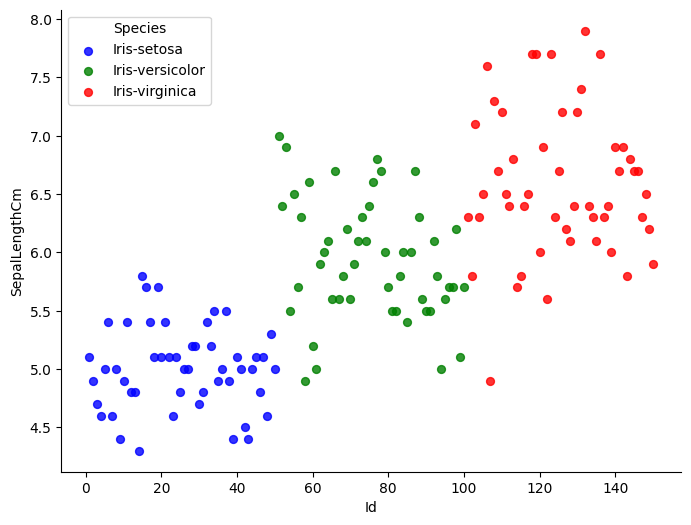

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Define colors for each species
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot
plt.figure(figsize=(8, 6))
for species in colors:
    subset = my_data[my_data['Species'] == species]
    plt.scatter(subset['Id'], subset['SepalLengthCm'], color=colors[species], label=subset['Species'].iloc[0], s=32, alpha=.8)

plt.xlabel('Id')
plt.ylabel('SepalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(title='Species', labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [ ]:
df = my_data.drop('Id', axis=1)
# Train test split! Set X, y
X = df.drop('Species', axis=1)
y =df['Species']

In [ ]:
# Convert this to numpy array
X = X.values
y = y.values

# Training the Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [ ]:
# convert X and y lables to float and long tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, lr = learing rate (if error doesn't go down after a bunch of iterations (epochs), lowe our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("Using CPU")

# Example tensor operation
tensor = torch.randn(3, 3).to(device)
print(f"Tensor is on {device}")

Using CPU
Tensor is on cpu


In [ ]:
# Training Model
epochs = 100
train_losses = []
val_losses = []

for i in range(epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()

    # Go forward and get a prediction
    y_pred = model(X_train) # Get predicted results

    # Measure the loss/error gonna be high at first
    train_loss = criterion(y_pred, y_train) # Predicated values vs y_train

    # Backpropagation: Take the error rate of forward propagation and feed it back through the network to fine-tune the weights
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        y_val = model(X_test)
        val_loss = criterion(y_val, y_test)
        val_losses.append(val_loss.item())

    # Print every 5 epochs
    if i % 5 == 0:
        print(f'Epoch {i}, Training Loss: {train_loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 0, Training Loss: 1.1156784296035767, Validation Loss: 1.0944794416427612
Epoch 5, Training Loss: 0.9625404477119446, Validation Loss: 0.9435026049613953
Epoch 10, Training Loss: 0.8505642414093018, Validation Loss: 0.8040114641189575
Epoch 15, Training Loss: 0.7128580808639526, Validation Loss: 0.6608399152755737
Epoch 20, Training Loss: 0.5777110457420349, Validation Loss: 0.5183319449424744
Epoch 25, Training Loss: 0.47188693284988403, Validation Loss: 0.41701024770736694
Epoch 30, Training Loss: 0.38640978932380676, Validation Loss: 0.33948567509651184
Epoch 35, Training Loss: 0.3096710443496704, Validation Loss: 0.27212753891944885
Epoch 40, Training Loss: 0.23972269892692566, Validation Loss: 0.2132808119058609
Epoch 45, Training Loss: 0.1839163452386856, Validation Loss: 0.16161733865737915
Epoch 50, Training Loss: 0.14051176607608795, Validation Loss: 0.12182734161615372
Epoch 55, Training Loss: 0.10764601081609726, Validation Loss: 0.08939933776855469
Epoch 60, Training 

# Results
# The training and validation losses

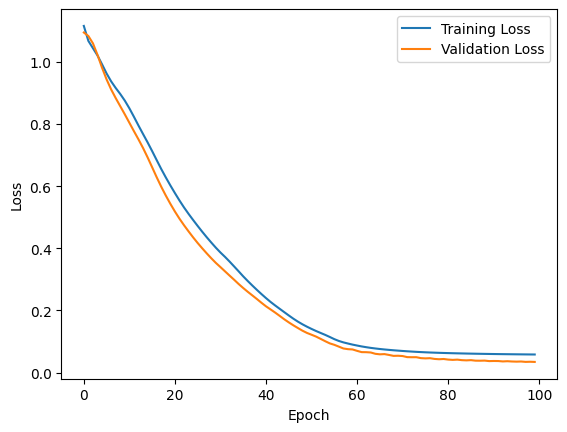

In [ ]:
# Plot training and validation loss curves
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Evaluate Model on test data set (validate model on test set)
with torch.no_grad(): # Basically turn off back propergation
    y_val = model(X_test) # X_test are features from our test set y_eval will be
    loss = criterion(y_val, y_test) # Find loss/error

In [ ]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # 0 == Iris-setosa
        # 1 == Iris-versicolor
        # 2 == Iris-virginica

        # Will tell us what type of flower class our network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Correct iterations: {correct}/{len(X_test)}')

1.) tensor([-2.4301,  6.6187,  2.2863]) 	 1 	 1
2.) tensor([ 13.8105,   5.0817, -16.4639]) 	 0 	 0
3.) tensor([ 11.5699,   5.4983, -14.0012]) 	 0 	 0
4.) tensor([-2.1428,  7.1899,  1.8770]) 	 1 	 1
5.) tensor([-7.5739,  5.0622,  9.4890]) 	 2 	 2
6.) tensor([-7.0857,  6.8921,  8.6466]) 	 2 	 2
7.) tensor([ 10.8575,   5.6213, -13.2192]) 	 0 	 0
8.) tensor([ 12.0864,   5.2360, -14.5235]) 	 0 	 0
9.) tensor([-1.5793,  7.1742,  1.1236]) 	 1 	 1
10.) tensor([ 12.6971,   5.5427, -15.2889]) 	 0 	 0
11.) tensor([-2.0144,  7.5903,  1.5821]) 	 1 	 1
12.) tensor([-7.9905,  4.2608, 10.4835]) 	 2 	 2
13.) tensor([-0.0696,  6.5265, -0.9155]) 	 1 	 1
14.) tensor([ 0.5565,  7.9214, -1.9656]) 	 1 	 1
15.) tensor([-6.5415,  5.1164,  8.2921]) 	 2 	 2
16.) tensor([-8.1535,  3.5067, 10.7758]) 	 2 	 2
17.) tensor([-2.9873,  6.2002,  3.1699]) 	 1 	 1
18.) tensor([-5.4875,  5.3318,  6.7883]) 	 2 	 2
19.) tensor([ 0.1705,  7.3831, -1.3701]) 	 1 	 1
20.) tensor([ 13.7874,   5.6577, -16.5346]) 	 0 	 0
21.) tensor

# Evaluation Metrics

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
correct = 0
y_true = []
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        output = model(data)
        prediction = output.argmax().item()
        y_true.append(y_test[i].item())
        y_pred.append(prediction)
        if prediction == y_test[i].item():
            correct += 1

# Calculate metrics
accuracy = correct / len(X_test) * 100
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print results
print(f'Correct predictions: {correct}/{len(X_test)}')
print(f'Accuracy: {accuracy:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Correct predictions: 30/30
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
new_iris = torch.tensor([[4.9, 3.8, 1.4, 0.4]]) # Create new data point

In [ ]:
with torch.no_grad(): # Feed data point through the our network
    print(model(new_iris))

tensor([[ 12.9435,   5.3866, -15.5420]])


In [ ]:
# Test it again
df_iris = torch.tensor([6.2, 3.4, 5.4, 2.3])
with torch.no_grad():
    print(model(df_iris))

tensor([-8.3266,  4.1410, 10.9459])


In [ ]:
# Save nn Model
torch.save(model.state_dict(), 'iris_model.pt')

In [ ]:
# Load the saved Model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [ ]:
# Loaded it correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=7, bias=True)
  (out): Linear(in_features=7, out_features=3, bias=True)
)